In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

from pandas.tools.plotting import scatter_matrix
import nltk
from ast import literal_eval
from datetime import timedelta
import string

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl

import spacy
nlp = spacy.load('en')

In [2]:
# create loader object
L = instaloader.Instaloader()

#Set PANDAS to show all columns in DataFrame
# pd.set_option('display.max_columns', None)
# plt.rcParams['figure.figsize'] = (15, 5)

UTC_FILE_NAME = "_UTC"
COMMENTS_FILE_NAME = "_comments"
FILE_ADDRESS_NAME = "InstagramLog/"


DONALD_TRUMP = 'realdonaldtrump'
DONALD_TRUMP_NAME = 'President Donald J. Trump'
DONALD_TRUMP_BIO = '45th President of the United States'
DONALD_TRUMP_COLOR = '#446fc4'
DONALD_TRUMP_TRAIN_SET = DONALD_TRUMP_NAME + DONALD_TRUMP + DONALD_TRUMP_BIO + 'president of the united state of america.'

BARACK_OBAMA = 'barackobama'
BARACK_OBAMA_NAME = 'Barack Obama'
BARACK_OBAMA_BIO = 'Dad, husband, President, citizen.'
BARACK_OBAMA_COLOR = '#7f2d9b'
BARACK_OBAMA_TRAIN_SET = BARACK_OBAMA + BARACK_OBAMA_NAME + BARACK_OBAMA_BIO + '44th President of the United States.'

EMMANUEL_MACRON = 'emmanuelmacron'
EMMANUEL_MACRON_NAME = 'Emmanuel Macron'
EMMANUEL_MACRON_BIO = 'Président de la République française.'
EMMANUEL_MACRON_COLOR = '#369b4f'
EMMANUEL_MACRON_TRAIN_SET = EMMANUEL_MACRON + EMMANUEL_MACRON_NAME + EMMANUEL_MACRON_BIO

#politicians
DONALD_TRUMP = 'realdonaldtrump'
BARACK_OBAMA = 'barackobama'
EMMANUEL_MACRON = 'emmanuelmacron'
THERESA_MAY = 'theresamay'
FLOTUS = 'flotus'

#news agencies
CNN = 'cnn'
FOXNEWS = 'foxnews'
BBC = 'bbcnews'
REUTERS = 'reuters'
GOAL_COM = 'goalglobal' #sport

# sport stars
LEOMESSI = 'leomessi'
CRISTIANO_RONALDO = 'cristiano'
RAFAEL_NADAL = 'rafaelnadal'
ROGER_FEDERER = 'rogerfederer'
NOVAK_DJOKOVIC = 'djokernole'

POLITICIAN = [DONALD_TRUMP, BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY]
NEWS_AGENCY = [CNN, BBC, FOXNEWS, REUTERS]
SPROTS_STAR = [LEOMESSI, CRISTIANO_RONALDO, ROGER_FEDERER, RAFAEL_NADAL]


LIST_ALL_USERS = [DONALD_TRUMP , BARACK_OBAMA, EMMANUEL_MACRON, THERESA_MAY, 
                  BBC, CNN, FOXNEWS, REUTERS, 
                  LEOMESSI, CRISTIANO_RONALDO, RAFAEL_NADAL, ROGER_FEDERER ]

LIST_CLUSTERS = ['C0_Fan_Page', 'C1_Ordinary_User', 'C2_Botlike' ]

LIST_CATEGORIES = ['Politician', 'News agency', 'Sports star' ]

LIST_PLOT_PATTERN = ['///', 'O', '\\\ ', '//\\',
                    '', '', '', '',
                    '==', 'oo', '0//', '////']


# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
instagram_db = instagramClient["Instagram"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]
instagram_col_analyse = instagram_db["Analyse"]
instagram_col_mentioned_in_comment = instagram_db["MentionedInComment"]

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/koosha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/koosha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load Clustered Data

In [3]:
df_clustered = pd.read_csv('clustered_data_new.csv')
print(df_clustered.shape[0])

3832


# convert to list

In [4]:
df_clustered['combined_similarity_photo_like'].fillna("--", inplace=True)
df_clustered['combined_similarity_photo_comment'].fillna("--", inplace=True)

df_clustered['comment_id'].fillna("--", inplace=True)
df_clustered['comment_created_at'].fillna("--", inplace=True)
df_clustered['comment_post_shortcode'].fillna("--", inplace=True)
df_clustered['comment_shortcode_username'].fillna("--", inplace=True)
df_clustered['comment_text'].fillna("--", inplace=True)
df_clustered['combined_similarity_photo_comment'].fillna("--", inplace=True)

df_clustered['like_id'].fillna("--", inplace=True)
df_clustered['like_post_shortcode'].fillna("--", inplace=True)
df_clustered['like_shortcode_username'].fillna("--", inplace=True)
df_clustered['combined_similarity_photo_like'].fillna("--", inplace=True)

# Calculate comment age

In [5]:
def convert_to_list(_row):
    
    converted_list = []
    if (not _row['comment_id'] == "--"):
        converted_list = _row['comment_id'].split(",,,")
    _row['comment_id'] = converted_list
    
    converted_list = []
    if (not _row['comment_created_at'] == "--"):
        converted_list = _row['comment_created_at'].split(",,,")
    _row['comment_created_at'] = converted_list
    
    converted_list = []
    if (not _row['comment_post_shortcode'] == "--"):
        converted_list = _row['comment_post_shortcode'].split(",,,")
    _row['comment_post_shortcode'] = converted_list
    
    converted_list = []
    if (not _row['comment_shortcode_username'] == "--"):
        converted_list = _row['comment_shortcode_username'].split(",,,")
    _row['comment_shortcode_username'] = converted_list
    
    converted_list = []
    if (not _row['comment_text'] == "--"):
        converted_list = _row['comment_text'].split(",,,")
    _row['comment_text'] = converted_list
    
    converted_list = []
    if (not _row['combined_similarity_photo_comment'] == "--"):
        converted_list = _row['combined_similarity_photo_comment'].split(",,,")
    _row['combined_similarity_photo_comment'] = converted_list
    
    
    
    
    converted_list = []
    if (not _row['like_id'] == "--"):
        converted_list = _row['like_id'].split(",,,")
    _row['like_id'] = converted_list
    
    converted_list = []
    if (not _row['like_post_shortcode'] == "--"):
        converted_list = _row['like_post_shortcode'].split(",,,")
    _row['like_post_shortcode'] = converted_list
    
    converted_list = []
    if (not _row['like_shortcode_username'] == "--"):
        converted_list = _row['like_shortcode_username'].split(",,,")
    _row['like_shortcode_username'] = converted_list
    
    converted_list = []
    if (not _row['combined_similarity_photo_like'] == "--"):
        converted_list = _row['combined_similarity_photo_like'].split(",,,")
    _row['combined_similarity_photo_like'] = converted_list
    
    
    return _row

df_clustered = df_clustered.apply(convert_to_list, axis=1)

In [6]:
def get_post_date(_row):
    
    date_list = []
    
    if (not _row['comment_total'] == 0):
        
        post_shortcodes = _row['comment_post_shortcode']
        for shortcode in post_shortcodes:
            post = instagram_col_post.find_one( { "shortcode" : shortcode }, {'date_utc': 1} )
            date_list.append(post['date_utc'])

    _row['comment_post_date'] = date_list
        
    return _row

In [7]:
df_clustered = df_clustered.apply(get_post_date, axis=1)

In [8]:
def calculate_age(_row):
       
    list_diff_in_sec = []
    avg = 0
      
    if (not _row['comment_total'] == 0):
        
        post_dates = _row['comment_post_date']
        comment_dates =  _row['comment_created_at']
        
        total_diff_in_second = 0
        
        for i in range(len(post_dates)):
            
            post_time = pd.to_datetime(post_dates[i], format='%Y-%m-%d %H:%M:%S')
            comment_time = pd.to_datetime(comment_dates[i], format='%Y-%m-%d %H:%M:%S')
            
            dif = (comment_time - post_time)
#             time_difference_in_minutes = dif / timedelta(minutes=1)
            total_diff_in_second += dif.total_seconds()
            list_diff_in_sec.append(str(dif.total_seconds()))
#             sec = timedelta(seconds=list_diff[0])
#             time = str(sec)
#             print(time)

        avg = total_diff_in_second / len(post_dates)
    
    _row['comment_avg_age_sec'] = avg
    
#     myString = ",,,".join(list_diff_in_sec)
    _row['comment_age_sec'] = list_diff_in_sec

    return _row

In [9]:
df_clustered = df_clustered.apply(calculate_age, axis=1)

# Clusters

In [10]:
class_method = 'class kmeans 3'
df_grouped = df_clustered.groupby(class_method)
groups = df_grouped.groups

In [11]:
grouped_c0_fan = df_grouped.get_group(1)
grouped_c1_ordinary = df_grouped.get_group(0)
grouped_c2_botlike = df_grouped.get_group(2)

c0_name_fan = 'C0-Fan-page'
c1_name_ordinary = 'C1-Ordinary-User'
c2_name_botlike = 'C2-Botlike'

In [12]:
print(grouped_c0_fan.shape[0])
print(grouped_c1_ordinary.shape[0])
print(grouped_c2_botlike.shape[0])

2102
1337
393


In [13]:
print(grouped_c0_fan['comment_total'].mean())
print(grouped_c1_ordinary['comment_total'].mean())
print(grouped_c2_botlike['comment_total'].mean())

1.1988582302568982
1.5699326851159312
0.544529262086514


In [14]:
print(grouped_c0_fan['like_total'].mean())
print(grouped_c1_ordinary['like_total'].mean())
print(grouped_c2_botlike['like_total'].mean()) 

0.4738344433872502
0.4869109947643979
0.26717557251908397


# Get all dataframes

In [15]:
def get_row_data_comment(_row, _id):

    tt = _row.iloc[0]

    _row['comment_id'] = tt['comment_id'][_id]
    _row['comment_created_at'] = tt['comment_created_at'][_id]
    _row['comment_post_shortcode'] = tt['comment_post_shortcode'][_id]
    _row['comment_shortcode_username'] = tt['comment_shortcode_username'][_id]
    _row['comment_text'] = tt['comment_text'][_id]
    _row['combined_similarity_photo_comment'] = tt['combined_similarity_photo_comment'][_id]
    _row['comment_post_date'] = tt['comment_post_date'][_id]
    _row['comment_age_sec'] = tt['comment_age_sec'][_id]

    return _row

In [16]:
def get_row_data_like(_row, _id):
    
    tt = _row.iloc[0]
    _row['like_id'] = tt['like_id'][_id]
    _row['like_post_shortcode'] = tt['like_post_shortcode'][_id]
    _row['like_shortcode_username'] = tt['like_shortcode_username'][_id]
    return _row


In [17]:
# get all dataframes

def get_dataframes(_df):
    
    #politicians
    df_c2_trump = _df[0:0]
    df_c2_comment_trump = _df[0:0]
    df_c2_like_trump = _df[0:0]

    df_c2_obama = _df[0:0]
    df_c2_comment_obama = _df[0:0]
    df_c2_like_obama = _df[0:0]

    df_c2_macron = _df[0:0]
    df_c2_comment_macron = _df[0:0]
    df_c2_like_macron = _df[0:0]

    df_c2_may = _df[0:0]
    df_c2_comment_may = _df[0:0]
    df_c2_like_may = _df[0:0]

    #news agencies
    df_c2_bbc = _df[0:0]
    df_c2_comment_bbc = _df[0:0]
    df_c2_like_bbc = _df[0:0]

    df_c2_cnn = _df[0:0]
    df_c2_comment_cnn = _df[0:0]
    df_c2_like_cnn = _df[0:0]

    df_c2_foxnews = _df[0:0]
    df_c2_comment_foxnews = _df[0:0]
    df_c2_like_foxnews = _df[0:0]

    df_c2_reuters = _df[0:0]
    df_c2_comment_reuters = _df[0:0]
    df_c2_like_reuters = _df[0:0]

    #sports star
    df_c2_messi = _df[0:0]
    df_c2_comment_messi = _df[0:0]
    df_c2_like_messi = _df[0:0]

    df_c2_ronaldo = _df[0:0]
    df_c2_comment_ronaldo = _df[0:0]
    df_c2_like_ronaldo = _df[0:0]

    df_c2_nadal = _df[0:0]
    df_c2_comment_nadal = _df[0:0]
    df_c2_like_nadal = _df[0:0]

    df_c2_federer = _df[0:0]
    df_c2_comment_federer = _df[0:0]
    df_c2_like_federer = _df[0:0]



    for index, row in _df.iterrows():

        #comment
        if (len(row['comment_shortcode_username']) > 0 ):
            for j in range(len(row['comment_shortcode_username'])):
                _name = row['comment_shortcode_username']

                #politicians
                if (_name[j] == DONALD_TRUMP):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_trump = pd.concat([df_c2_comment_trump, df_row])

                if (_name[j] == BARACK_OBAMA):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_obama = pd.concat([df_c2_comment_obama, df_row])

                if (_name[j] == EMMANUEL_MACRON):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_macron = pd.concat([df_c2_comment_macron, df_row])

                if (_name[j] == THERESA_MAY):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_may = pd.concat([df_c2_comment_may, df_row])


                #News agencies
                if (_name[j] == BBC):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_bbc = pd.concat([df_c2_comment_bbc, df_row])

                if (_name[j] == CNN):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_cnn = pd.concat([df_c2_comment_cnn, df_row])

                if (_name[j] == FOXNEWS):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_foxnews = pd.concat([df_c2_comment_foxnews, df_row])

                if (_name[j] == REUTERS):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_reuters = pd.concat([df_c2_comment_reuters, df_row])


                #Sports star
                if (_name[j] == LEOMESSI):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_messi = pd.concat([df_c2_comment_messi, df_row])

                if (_name[j] == CRISTIANO_RONALDO):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_ronaldo = pd.concat([df_c2_comment_ronaldo, df_row])

                if (_name[j] == RAFAEL_NADAL):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_nadal = pd.concat([df_c2_comment_nadal, df_row])

                if (_name[j] == ROGER_FEDERER):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_comment(df_row , j)
                    df_c2_comment_federer = pd.concat([df_c2_comment_federer, df_row])


        #like
        if (len(row['like_shortcode_username']) > 0 ):
            for j in range(len(row['like_shortcode_username'])):
                _name = row['like_shortcode_username']

                #politicians
                if (_name[j] == DONALD_TRUMP):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_trump = pd.concat([df_c2_like_trump, df_row])

                if (_name[j] == BARACK_OBAMA):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_obama = pd.concat([df_c2_like_obama, df_row])

                if (_name[j] == EMMANUEL_MACRON):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_macron = pd.concat([df_c2_like_macron, df_row])

                if (_name[j] == THERESA_MAY):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_may = pd.concat([df_c2_like_may, df_row])


                #news agencies
                if (_name[j] == BBC):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_bbc = pd.concat([df_c2_like_bbc, df_row])

                if (_name[j] == CNN):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_cnn = pd.concat([df_c2_like_cnn, df_row])

                if (_name[j] == FOXNEWS):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_foxnews = pd.concat([df_c2_like_foxnews, df_row])

                if (_name[j] == REUTERS):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_reuters = pd.concat([df_c2_like_reuters, df_row])


                #sports star
                if (_name[j] == LEOMESSI):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_messi = pd.concat([df_c2_like_messi, df_row])

                if (_name[j] == CRISTIANO_RONALDO):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_ronaldo = pd.concat([df_c2_like_ronaldo, df_row])

                if (_name[j] == RAFAEL_NADAL):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_nadal = pd.concat([df_c2_like_nadal, df_row])

                if (_name[j] == ROGER_FEDERER):
                    df_row = _df.loc[_df['owener_id'] == row['owener_id']]
                    df_row = get_row_data_like(df_row , j)
                    df_c2_like_federer = pd.concat([df_c2_like_federer, df_row])

    return df_c2_comment_trump, df_c2_comment_obama, df_c2_comment_macron, df_c2_comment_may, df_c2_comment_bbc, df_c2_comment_cnn, df_c2_comment_foxnews, df_c2_comment_reuters, df_c2_comment_messi, df_c2_comment_ronaldo, df_c2_comment_nadal, df_c2_comment_federer, df_c2_like_trump, df_c2_like_obama, df_c2_like_macron, df_c2_like_may, df_c2_like_bbc, df_c2_like_cnn, df_c2_like_foxnews, df_c2_like_reuters, df_c2_like_messi, df_c2_like_ronaldo, df_c2_like_nadal, df_c2_like_federer

In [34]:
df_c0_comment_trump, df_c0_comment_obama, df_c0_comment_macron, df_c0_comment_may, df_c0_comment_bbc, df_c0_comment_cnn, df_c0_comment_foxnews, df_c0_comment_reuters, df_c0_comment_messi, df_c0_comment_ronaldo, df_c0_comment_nadal, df_c0_comment_federer, df_c0_like_trump, df_c0_like_obama, df_c0_like_macron, df_c0_like_may, df_c0_like_bbc, df_c0_like_cnn, df_c0_like_foxnews, df_c0_like_reuters, df_c0_like_messi, df_c0_like_ronaldo, df_c0_like_nadal, df_c0_like_federer = get_dataframes(grouped_c0_fan)

In [45]:
df_c0_comment_trump.to_csv(r'DataFrames/df_c0_comment_trump.csv')
df_c0_comment_obama.to_csv(r'DataFrames/df_c0_comment_obama.csv')
df_c0_comment_macron.to_csv(r'DataFrames/df_c0_comment_macron.csv')
df_c0_comment_may.to_csv(r'DataFrames/df_c0_comment_may.csv')

df_c0_comment_bbc.to_csv(r'DataFrames/df_c0_comment_bbc.csv')
df_c0_comment_cnn.to_csv(r'DataFrames/df_c0_comment_cnn.csv')
df_c0_comment_foxnews.to_csv(r'DataFrames/df_c0_comment_foxnews.csv')
df_c0_comment_reuters.to_csv(r'DataFrames/df_c0_comment_reuters.csv')

df_c0_comment_messi.to_csv(r'DataFrames/df_c0_comment_messi.csv')
df_c0_comment_ronaldo.to_csv(r'DataFrames/df_c0_comment_ronaldo.csv')
df_c0_comment_nadal.to_csv(r'DataFrames/df_c0_comment_nadal.csv')
df_c0_comment_federer.to_csv(r'DataFrames/df_c0_comment_federer.csv')


df_c0_like_trump.to_csv(r'DataFrames/df_c0_like_trump.csv')
df_c0_like_obama.to_csv(r'DataFrames/df_c0_like_obama.csv')
df_c0_like_macron.to_csv(r'DataFrames/df_c0_like_macron.csv')
df_c0_like_may.to_csv(r'DataFrames/df_c0_like_may.csv')

df_c0_like_bbc.to_csv(r'DataFrames/df_c0_like_bbc.csv')
df_c0_like_cnn.to_csv(r'DataFrames/df_c0_like_cnn.csv')
df_c0_like_foxnews.to_csv(r'DataFrames/df_c0_like_foxnews.csv')
df_c0_like_reuters.to_csv(r'DataFrames/df_c0_like_reuters.csv')

df_c0_like_messi.to_csv(r'DataFrames/df_c0_like_messi.csv')
df_c0_like_ronaldo.to_csv(r'DataFrames/df_c0_like_ronaldo.csv')
df_c0_like_nadal.to_csv(r'DataFrames/df_c0_like_nadal.csv')
df_c0_like_federer.to_csv(r'DataFrames/df_c0_like_federer.csv')



In [43]:
df_c1_comment_trump, df_c1_comment_obama, df_c1_comment_macron, df_c1_comment_may, df_c1_comment_bbc, df_c1_comment_cnn, df_c1_comment_foxnews, df_c1_comment_reuters, df_c1_comment_messi, df_c1_comment_ronaldo, df_c1_comment_nadal, df_c1_comment_federer, df_c1_like_trump, df_c1_like_obama, df_c1_like_macron, df_c1_like_may, df_c1_like_bbc, df_c1_like_cnn, df_c1_like_foxnews, df_c1_like_reuters, df_c1_like_messi, df_c1_like_ronaldo, df_c1_like_nadal, df_c1_like_federer = get_dataframes(grouped_c1_ordinary)


/home/koosha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/koosha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/koosha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

KeyboardInterrupt: 

In [46]:
df_c1_comment_trump.to_csv(r'DataFrames/df_c1_comment_trump.csv')
df_c1_comment_obama.to_csv(r'DataFrames/df_c1_comment_obama.csv')
df_c1_comment_macron.to_csv(r'DataFrames/df_c1_comment_macron.csv')
df_c1_comment_may.to_csv(r'DataFrames/df_c1_comment_may.csv')

df_c1_comment_bbc.to_csv(r'DataFrames/df_c1_comment_bbc.csv')
df_c1_comment_cnn.to_csv(r'DataFrames/df_c1_comment_cnn.csv')
df_c1_comment_foxnews.to_csv(r'DataFrames/df_c1_comment_foxnews.csv')
df_c1_comment_reuters.to_csv(r'DataFrames/df_c1_comment_reuters.csv')

df_c1_comment_messi.to_csv(r'DataFrames/df_c1_comment_messi.csv')
df_c1_comment_ronaldo.to_csv(r'DataFrames/df_c1_comment_ronaldo.csv')
df_c1_comment_nadal.to_csv(r'DataFrames/df_c1_comment_nadal.csv')
df_c1_comment_federer.to_csv(r'DataFrames/df_c1_comment_federer.csv')


df_c1_like_trump.to_csv(r'DataFrames/df_c1_like_trump.csv')
df_c1_like_obama.to_csv(r'DataFrames/df_c1_like_obama.csv')
df_c1_like_macron.to_csv(r'DataFrames/df_c1_like_macron.csv')
df_c1_like_may.to_csv(r'DataFrames/df_c1_like_may.csv')

df_c1_like_bbc.to_csv(r'DataFrames/df_c1_like_bbc.csv')
df_c1_like_cnn.to_csv(r'DataFrames/df_c1_like_cnn.csv')
df_c1_like_foxnews.to_csv(r'DataFrames/df_c1_like_foxnews.csv')
df_c1_like_reuters.to_csv(r'DataFrames/df_c1_like_reuters.csv')

df_c1_like_messi.to_csv(r'DataFrames/df_c1_like_messi.csv')
df_c1_like_ronaldo.to_csv(r'DataFrames/df_c1_like_ronaldo.csv')
df_c1_like_nadal.to_csv(r'DataFrames/df_c1_like_nadal.csv')
df_c1_like_federer.to_csv(r'DataFrames/df_c1_like_federer.csv')



In [40]:
df_c2_comment_trump, df_c2_comment_obama, df_c2_comment_macron, df_c2_comment_may, df_c2_comment_bbc, df_c2_comment_cnn, df_c2_comment_foxnews, df_c2_comment_reuters, df_c2_comment_messi, df_c2_comment_ronaldo, df_c2_comment_nadal, df_c2_comment_federer, df_c2_like_trump, df_c2_like_obama, df_c2_like_macron, df_c2_like_may, df_c2_like_bbc, df_c2_like_cnn, df_c2_like_foxnews, df_c2_like_reuters, df_c2_like_messi, df_c2_like_ronaldo, df_c2_like_nadal, df_c2_like_federer = get_dataframes(grouped_c2_botlike)

In [47]:
df_c2_comment_trump.to_csv(r'DataFrames/df_c2_comment_trump.csv')
df_c2_comment_obama.to_csv(r'DataFrames/df_c2_comment_obama.csv')
df_c2_comment_macron.to_csv(r'DataFrames/df_c2_comment_macron.csv')
df_c2_comment_may.to_csv(r'DataFrames/df_c2_comment_may.csv')

df_c2_comment_bbc.to_csv(r'DataFrames/df_c2_comment_bbc.csv')
df_c2_comment_cnn.to_csv(r'DataFrames/df_c2_comment_cnn.csv')
df_c2_comment_foxnews.to_csv(r'DataFrames/df_c2_comment_foxnews.csv')
df_c2_comment_reuters.to_csv(r'DataFrames/df_c2_comment_reuters.csv')

df_c2_comment_messi.to_csv(r'DataFrames/df_c2_comment_messi.csv')
df_c2_comment_ronaldo.to_csv(r'DataFrames/df_c2_comment_ronaldo.csv')
df_c2_comment_nadal.to_csv(r'DataFrames/df_c2_comment_nadal.csv')
df_c2_comment_federer.to_csv(r'DataFrames/df_c2_comment_federer.csv')


df_c2_like_trump.to_csv(r'DataFrames/df_c2_like_trump.csv')
df_c2_like_obama.to_csv(r'DataFrames/df_c2_like_obama.csv')
df_c2_like_macron.to_csv(r'DataFrames/df_c2_like_macron.csv')
df_c2_like_may.to_csv(r'DataFrames/df_c2_like_may.csv')

df_c2_like_bbc.to_csv(r'DataFrames/df_c2_like_bbc.csv')
df_c2_like_cnn.to_csv(r'DataFrames/df_c2_like_cnn.csv')
df_c2_like_foxnews.to_csv(r'DataFrames/df_c2_like_foxnews.csv')
df_c2_like_reuters.to_csv(r'DataFrames/df_c2_like_reuters.csv')

df_c2_like_messi.to_csv(r'DataFrames/df_c2_like_messi.csv')
df_c2_like_ronaldo.to_csv(r'DataFrames/df_c2_like_ronaldo.csv')
df_c2_like_nadal.to_csv(r'DataFrames/df_c2_like_nadal.csv')
df_c2_like_federer.to_csv(r'DataFrames/df_c2_like_federer.csv')



# Dataframe like+comment each case

In [23]:
# df of both comment and like in each usecase - c2

#politicians
df_c2_both_trump = pd.concat([df_c2_comment_trump, df_c2_like_trump])
df_c2_both_obama = pd.concat([df_c2_comment_obama, df_c2_like_obama])
df_c2_both_macron = pd.concat([df_c2_comment_macron, df_c2_like_macron])
df_c2_both_may = pd.concat([df_c2_comment_may, df_c2_like_may])

#News agencies
df_c2_both_bbc = pd.concat([df_c2_comment_bbc, df_c2_like_bbc])
df_c2_both_cnn = pd.concat([df_c2_comment_cnn, df_c2_like_cnn])
df_c2_both_foxnews = pd.concat([df_c2_comment_foxnews, df_c2_like_foxnews])
df_c2_both_reuters = pd.concat([df_c2_comment_reuters, df_c2_like_reuters])

#Sports star
df_c2_both_messi = pd.concat([df_c2_comment_messi, df_c2_like_messi])
df_c2_both_ronaldo = pd.concat([df_c2_comment_ronaldo, df_c2_like_ronaldo])
df_c2_both_nadal = pd.concat([df_c2_comment_nadal, df_c2_like_nadal])
df_c2_both_federer = pd.concat([df_c2_comment_federer, df_c2_like_federer])

# Dataframe comment - per use case

In [24]:
#df of all comments per usecase
df_comment_trump = pd.concat([df_c0_comment_trump, df_c1_comment_trump, df_c2_comment_trump])
df_comment_obama = pd.concat([df_c0_comment_obama, df_c1_comment_obama, df_c2_comment_obama])
df_comment_macron = pd.concat([df_c0_comment_macron, df_c1_comment_macron, df_c2_comment_macron])
df_comment_may = pd.concat([df_c0_comment_may, df_c1_comment_may, df_c2_comment_may])

df_comment_bbc = pd.concat([df_c0_comment_bbc, df_c1_comment_bbc, df_c2_comment_bbc])
df_comment_cnn = pd.concat([df_c0_comment_cnn, df_c1_comment_cnn, df_c2_comment_cnn])
df_comment_foxnews = pd.concat([df_c0_comment_foxnews, df_c1_comment_foxnews, df_c2_comment_foxnews])
df_comment_reuters = pd.concat([df_c0_comment_reuters, df_c1_comment_reuters, df_c2_comment_reuters])

df_comment_messi = pd.concat([df_c0_comment_messi, df_c1_comment_messi, df_c2_comment_messi])
df_comment_ronaldo = pd.concat([df_c0_comment_ronaldo, df_c1_comment_ronaldo, df_c2_comment_ronaldo])
df_comment_nadal = pd.concat([df_c0_comment_nadal, df_c1_comment_nadal, df_c2_comment_nadal])
df_comment_federer = pd.concat([df_c0_comment_federer, df_c1_comment_federer, df_c2_comment_federer])

# Dataframe comment - per category

In [25]:
#df of all comments per usecase
df_comment_politician = pd.concat([df_comment_trump, df_comment_obama, df_comment_macron, df_comment_may])

df_comment_newsagency = pd.concat([df_comment_bbc, df_comment_cnn, df_comment_foxnews, df_comment_reuters])

df_comment_sportstar = pd.concat([df_comment_messi, df_comment_ronaldo, df_comment_nadal, df_comment_federer])

# Dataframe comment - per cluster

In [26]:
# df all comment - c2

df_c0_comments = pd.concat([df_c0_comment_trump, df_c0_comment_obama, df_c0_comment_macron, df_c0_comment_may,
                           df_c0_comment_bbc, df_c0_comment_cnn, df_c0_comment_foxnews, df_c0_comment_reuters,
                            df_c0_comment_messi, df_c0_comment_ronaldo, df_c0_comment_nadal, df_c0_comment_federer,
                           ])


df_c1_comments = pd.concat([df_c1_comment_trump, df_c1_comment_obama, df_c1_comment_macron, df_c1_comment_may,
                           df_c1_comment_bbc, df_c1_comment_cnn, df_c1_comment_foxnews, df_c1_comment_reuters,
                            df_c1_comment_messi, df_c1_comment_ronaldo, df_c1_comment_nadal, df_c1_comment_federer,
                           ])


df_c2_comments = pd.concat([df_c2_comment_trump, df_c2_comment_obama, df_c2_comment_macron, df_c2_comment_may,
                           df_c2_comment_bbc, df_c2_comment_cnn, df_c2_comment_foxnews, df_c2_comment_reuters,
                            df_c2_comment_messi, df_c2_comment_ronaldo, df_c2_comment_nadal, df_c2_comment_federer,
                           ])

print("cluster 0-fan: " + str(df_c0_comments.shape[0]))
print("cluster 1-ordinary: " + str(df_c1_comments.shape[0]))
print("cluster 2-botlike: " + str(df_c2_comments.shape[0]))

cluster 0-fan: 2519
cluster 1-ordinary: 2087
cluster 2-botlike: 213


# Distributions

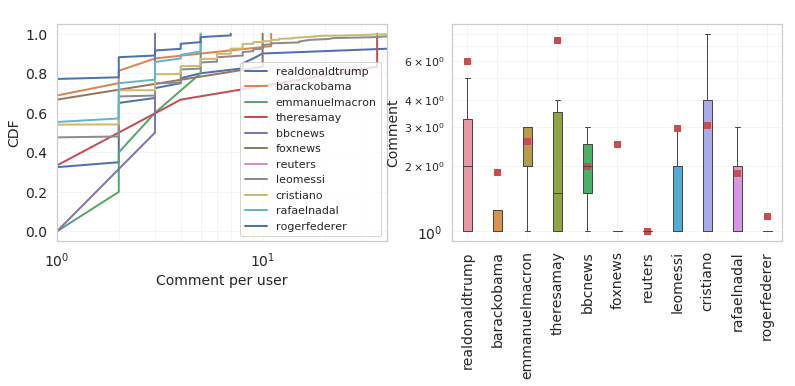

In [27]:
# total comment received by unique suers across usecase
def plot_0():
    
    def get_comment_per_user(_df):
        list_res = []
        for name, group in _df.groupby('owener_id'):
            list_res.append(group.shape[0])
        return list_res

    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,2, figsize=(13,4))
    
    ALL_DF = [df_comment_trump, df_comment_obama, df_comment_macron, df_comment_may,
              df_comment_bbc, df_comment_cnn, df_comment_foxnews, df_comment_reuters,
              df_comment_messi, df_comment_ronaldo, df_comment_nadal, df_comment_federer,
             ]
    
    counter = 0
    df_boxplot = pd.DataFrame()
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_comment_per_user(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes[0], legend=True, label=LIST_ALL_USERS[counter])
            
            
            data =  pd.DataFrame(get_comment_per_user(item))
            data.columns = ['comment']            
            df_boxplot[LIST_ALL_USERS[counter]] = data['comment']
            
        counter += 1

    ax.axes.set_xlim([1,40])
#     ax.axes.set_ylim([0.4,1.03])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Comment per user")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(14)
    
    

    #box plot
    boxplot = sns.boxplot( data=df_boxplot, showfliers=False, width= 0.3, linewidth=1, ax=axes[1])
    boxplot.plot(df_boxplot.mean(), 'rs')
    boxplot.grid(True, which='both', linestyle='-', alpha=0.2)
#     boxplot.set_xlabel("Clusters")
    boxplot.set_ylabel("Comment")
    boxplot.set_yscale('log')
    boxplot.set_title(" ")
    boxplot.xaxis.set_tick_params(rotation=90)
    
    for item in ([boxplot.title, boxplot.xaxis.label, boxplot.yaxis.label] + boxplot.get_xticklabels() + boxplot.get_yticklabels()): item.set_fontsize(14)
    
    plt.savefig("plot_MLearning12_P0.pdf", bbox_inches='tight')
    
plot_0()

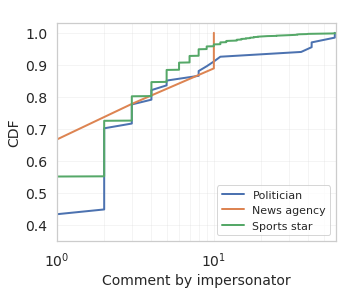

In [28]:
# total comment received by unique suers across usecase
def plot_0_1():
    
    def get_comment_per_user(_df):
        list_res = []
        for name, group in _df.groupby('owener_id'):
            list_res.append(group.shape[0])
        return list_res

    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_comment_politician, 
              df_comment_newsagency, 
              df_comment_sportstar
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_comment_per_user(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CATEGORIES[counter])
            
        counter += 1

    ax.axes.set_xlim([1,60])
    ax.axes.set_ylim([0.35,1.03])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Comment by impersonator")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(14)
    
    plt.savefig("plot_MLearning12_P0_1.pdf", bbox_inches='tight')
    
plot_0_1()

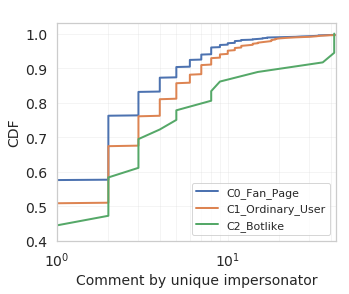

In [29]:
# comment issued by unique impersonaro across clusters
def plot_1():
    
    def get_comment_per_user(_df):
        list_res = []
        for name, group in _df.groupby('owener_id'):
            list_res.append(group.shape[0])
        return list_res

    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_c0_comments, 
              df_c1_comments, 
              df_c2_comments
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_comment_per_user(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CLUSTERS[counter])
            
        counter += 1

    ax.axes.set_xlim([1,43])
    ax.axes.set_ylim([0.4,1.03])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Comment by unique impersonator")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(14)
    
    plt.savefig("plot_MLearning12_P1.pdf", bbox_inches='tight')
    
plot_1()

In [30]:
df_c0_comments.columns

Index(['Unnamed: 0', 'username', 'name', 'bio', 'photo', 'nfollower',
       'nfollowee', 'nmediacount', 'follower', 'followee', 'mediacount',
       'private', 'verified', 'lcm', 'mcm', 'nmcm', 'class', 'class BGM 3',
       'class GM 3', 'class kmeans 3', 'class spectral 3', 'class GM 4',
       'owener_id', 'combined_owener_external_url', 'combined_username',
       'combined_full_name', 'combined_profile_pic_url', 'combined_biography',
       'combined_similarity_photo_comment', 'combined_similarity_photo_like',
       'comment_created_at', 'comment_id', 'comment_post_shortcode',
       'comment_shortcode_username', 'comment_text', 'comment_total',
       'like_total', 'like_shortcode_username', 'like_post_shortcode',
       'like_id', 'comment_post_date', 'comment_avg_age_sec',
       'comment_age_sec'],
      dtype='object')

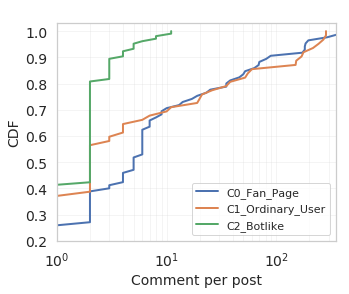

In [42]:
# 
def plot_2():
    
    def get_comment_per_post(_df):
        list_res = []
        for name, group in _df.groupby('comment_post_shortcode'):
            list_res.append(group.shape[0])
        return list_res
    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1,1, figsize=(5,4))
    
    ALL_DF = [df_c0_comments, 
              df_c1_comments, 
              df_c2_comments
             ]
    
    counter = 0
    
    for item in ALL_DF:
        if (item.shape[0] != 0):
                
            ser = pd.Series(get_comment_per_post(item))
            ser = ser.sort_values()
            ser[len(ser)] = ser.iloc[-1]
            cum_dist = np.linspace(0.,1.,len(ser))
            ser_cdf = pd.Series(cum_dist, index=ser) 
            ax = ser_cdf.plot(logx=True, grid=True, linewidth=2, ax=axes, legend=True, label=LIST_CLUSTERS[counter])
            
        counter += 1

    ax.axes.set_xlim([1,350])
    ax.axes.set_ylim([0.2,1.03])
    ax.set_ylabel("CDF")
    ax.set_xlabel("Comment per post")
    ax.set_title(" ")
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(14)
    
    plt.savefig("plot_MLearning12_P2.pdf", bbox_inches='tight')
    
plot_2()